In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pd.options.display.max_colwidth = 200

# Load test result

In [2]:
df = pd.read_csv('data/model_compare4.csv')

In [3]:
print(df.columns)
display(df.sample(2))

Index(['org_title', 'lower_title', 'cleaned_words', 'cleaned_pos',
       'minimal_words', 'y_true', 'nb_og', 'nb_og_p0', 'nb_og_p1', 'nb_lo',
       'nb_lo_p0', 'nb_lo_p1', 'nb_cw', 'nb_cw_p0', 'nb_cw_p1', 'nb_ps',
       'nb_ps_p0', 'nb_ps_p1', 'nb_mw', 'nb_mw_p0', 'nb_mw_p1', 'fnn_og',
       'fnn_og_p0', 'fnn_og_p1', 'fnn_lo', 'fnn_lo_p0', 'fnn_lo_p1', 'fnn_cw',
       'fnn_cw_p0', 'fnn_cw_p1', 'fnn_ps', 'fnn_ps_p0', 'fnn_ps_p1', 'fnn_mw',
       'fnn_mw_p0', 'fnn_mw_p1', 'lstm_og', 'lstm_og_p0', 'lstm_og_p1',
       'lstm_lo', 'lstm_lo_p0', 'lstm_lo_p1', 'lstm_cw', 'lstm_cw_p0',
       'lstm_cw_p1', 'lstm_ps', 'lstm_ps_p0', 'lstm_ps_p1', 'lstm_mw',
       'lstm_mw_p0', 'lstm_mw_p1', 'too_long', 'noisy', 'slang', 'donald',
       'obama', 'hillary', 'bernie'],
      dtype='object')


,org_title,lower_title,cleaned_words,cleaned_pos,minimal_words,y_true,nb_og,nb_og_p0,nb_og_p1,nb_lo,...,lstm_mw,lstm_mw_p0,lstm_mw_p1,too_long,noisy,slang,donald,obama,hillary,bernie
527,ART OF WAR: What’s Behind Russia’s ‘Ides of March’ Military Drawdown in Syria?,art of war: what’s behind russia’s ‘ides of march’ military drawdown in syria?,art of war : what’s behind russia’s ‘ides of march’ military drawdown in syria ?,NN IN NN : NN IN NN NNS IN NN JJ NN IN NNS .,art war behind russia ides march military drawdown syria,1,0,9.132815e-01,0.086718,0,...,0,0.998931,0.001069,0,1,0,0,0,0,0
1827,"CNBC EDITOR: Media Must Remember Readers Are Not ‘as Ignorant, as Stupid as We Think They Are’ [Video]","cnbc editor: media must remember readers are not ‘as ignorant, as stupid as we think they are’ [video]","cnbc editor : media must remember readers are not ‘as ignorant , as stupid as we think they are’ [ video ]","NN NN : NNP NN VB NNS NN RB NN NN , IN JJ IN PRP VB PRP NN NN NN NN",cnbc editor medium must remember reader ignorant stupid think video,1,1,5.324562e-08,1.000000,1,...,1,0.000007,0.999993,0,1,0,0,0,0,0


In [4]:
seq_type = ['Original','Lower','CleanedWords','PoS','MinimalWords']
ml_type = ['NaiveBayes','FNN','LSTM']
seq_type_abb = ['og','lo','cw','ps','mw']
ml_type_abb = ['nb','fnn','lstm']
cut_name = ['too_long','noisy','slang','donald', 'obama', 'hillary', 'bernie']
x_name = df.columns[:len(seq_type)]


X = []
for i in range(len(seq_type)):
    X.append(df[x_name[i]].to_numpy())

y_true = df.y_true.to_numpy()

# name of all models
y_name = []
for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        y_name.append(ml_type_abb[i]+'_'+seq_type_abb[j])
        
for i in range(len(cut_name)):
    y_name.append(cut_name[i])

# prediction
y_pred = []
for i in range(len(y_name)):
    y_pred.append(df[y_name[i]].to_numpy())

# probability
fake_prob = []
for i in range(len(ml_type)*len(seq_type)):
    fake_prob.append(df[y_name[i]+'_p1'].to_numpy())

# Score summary

In [5]:
df_entries = []


for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        ac = accuracy_score(y_true, y_pred[k])
        pr = precision_score(y_true, y_pred[k])
        re = recall_score(y_true, y_pred[k])
        f1 = f1_score(y_true, y_pred[k])
        df_entries.append([ml_type[i],seq_type[j],ac,pr,re,f1])
        
df_summary = pd.DataFrame(df_entries, columns = ['model','input','accuracy','precision','recall','f1score'])        
        

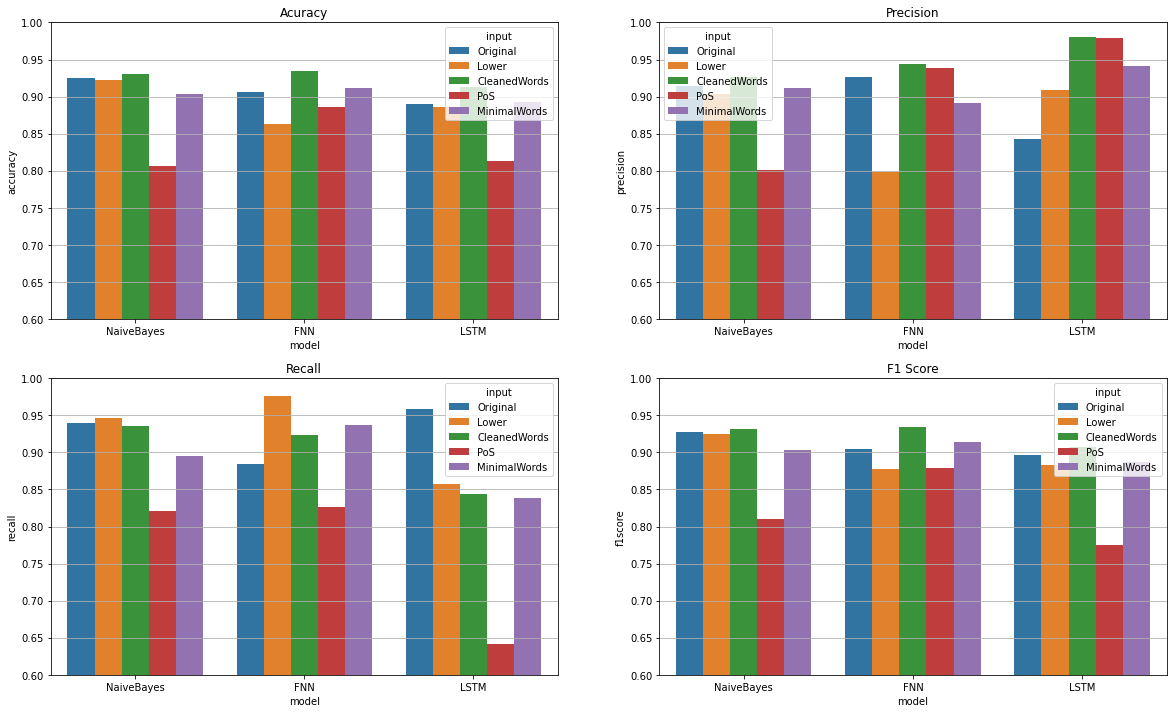

In [16]:
plt.rcParams["figure.figsize"] = (20,12)

fig, ax = plt.subplots(2, 2)

ax[0, 0].set_title('Acuracy')
ax[0, 0].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="accuracy", hue="input", data=df_summary, ax = ax[0, 0])
ax[0, 0].grid(True, axis='y')

ax[0, 1].set_title('Precision')
ax[0, 1].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="precision", hue="input", data=df_summary, ax = ax[0, 1])
ax[0, 1].grid(True, axis='y')

ax[1, 0].set_title('Recall')
ax[1, 0].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="recall", hue="input", data=df_summary, ax = ax[1, 0])
ax[1, 0].grid(True, axis='y')

ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="f1score", hue="input", data=df_summary, ax = ax[1, 1])
ax[1, 1].grid(True, axis='y')

plt.show()

# Right/Wrong classification examples

In [7]:
df_r = []
df_w = []

for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        #y_name = ml_type_abb[i]+'_'+seq_type_abb[j]
        
        r = df[df.y_true==df[y_name[k]]][['org_title','y_true',y_name[k]+'_p1']]
        w = df[df.y_true!=df[y_name[k]]][['org_title','y_true',y_name[k]+'_p1']]
        
        r['gap'] = abs(r[y_name[k]+'_p1']-r.y_true)
        w['gap'] = abs(w[y_name[k]+'_p1']-w.y_true)
        
        r.sort_values(by=['gap'],axis=0,inplace=True)
        w.sort_values(by=['gap'],axis=0,inplace=True)
        
        df_r.append(r)
        df_w.append(w)        

In [8]:
for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        title = ml_type[i],seq_type[j]
        
        print(title,' Right, confident')
        display(df_r[k].iloc[:10])
        
        print(title,' Right, subtle')
        display(df_r[k].iloc[-10:])
        
        print(title,' Wrong, subtle')
        display(df_w[k].iloc[:10])        
        
        
        print(title,' Wrong, confident')
        display(df_w[k].iloc[-10:])
        

        

('NaiveBayes', 'Original')  Right, confident


,org_title,y_true,nb_og_p1,gap
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,1.0,0.000000e+00
366,"BREAKING NEWS: N. AMERICAN FAMILY Held Hostage During Obama Presidency RESCUED In Pakistan: “This is a country that did not respect us, this is a country that respects us now” [VIDEO]",1,1.0,0.000000e+00
1693,"WOW! REFUGEES EXPOSED: Here’s the cold hard truth the media won’t tell you…“If Saudi Arabia is refusing to accept them because they are a national security threat, why are we accepting them?” [VIDEO]",1,1.0,0.000000e+00
651,LEFT GOES NUTS After Antifa Woman Attacking Trump Supporter Got Punched…That Was Before This Photo Revealed What She Had In Her Hand [VIDEO],1,1.0,0.000000e+00
947,WOW! LEGAL HISPANIC AMERICAN IMMIGRANT Unloads On Racist Hillary Supporters: “Liberals Are Desperate Because They Know They’re Gonna Lose” [VIDEO],1,1.0,2.842171e-14
912,"(VIDEO) MICHELLE OBAMA GIVES AWKWARD RANT: You know, You know… Barack ‘works all the time,’ ‘he is never off’",1,1.0,1.135758e-13
1843,WATCH: BLACK CONSERVATIVE DESTROYS Mexican Flag Carrying Protesters: “If Your Country Is So Great…Why Are You Here?,1,1.0,1.704192e-13
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,1.0,1.989520e-13
1438,SINGER JOY VILLA Gives AMAZING SPEECH At WI #March4Trump Rally: “We are not gonna be bullied…We are not gonna be spit on…United we are strong…We are not going to fall” [VIDEO],1,1.0,1.989520e-13
703,SHOCKING VIDEO: Muslim Child Bride Forced to Wed Man 20 Years Older…You won’t believe what he trades for her! [Video],1,1.0,3.411715e-13


('NaiveBayes', 'Original')  Right, subtle


,org_title,y_true,nb_og_p1,gap
1682,One in five Indonesian students support Islamic caliphate: survey,0,0.473211,0.473211
1214,Trump Shamefully Uses Hurricane Devastation To Promote Tax Cuts For The Wealthy,1,0.523020,0.476980
1422,The Trump presidency on Feb 15 at 8:29 p.m. EST,0,0.478315,0.478315
1423,"War crimes convict Praljak took cyanide, Dutch prosecutors say",0,0.478403,0.478403
205,Wealthy donors drawn to Rubio White House bid after Bush drops out,0,0.480712,0.480712
1336,Trump says he will back away from business to focus on White House,0,0.481424,0.481424
1685,Kremlin says got Trump adviser email about tower project but ignored it,0,0.484117,0.484117
328,EXPERT CLAIMS N. KOREA’S SECOND MISSILE Test Demonstrates They Now Have Ability To Hit 3 Major Cities On U.S. Mainland,1,0.514198,0.485802
1823,U.S. coal miners applaud Republican axing of stream protections,0,0.489007,0.489007
387,Experts Warn This Trump Plan Would Cause ‘Global Financial Meltdown’,1,0.500235,0.499765


('NaiveBayes', 'Original')  Wrong, subtle


,org_title,y_true,nb_og_p1,gap
1750,Trump’s Rhetoric Just Resulted In A Trillion Dollar Economic Loss Worldwide,1,0.490960,0.509040
875,"Factbox: The economy, guns top on social media during U.S. Republican debate",0,0.511130,0.511130
1964,UPDATE: 12 STATES NOW Giving Obama Middle Finger On UNLAWFUL Transgender Bathroom Decree,1,0.486338,0.513662
758,Trump's choice for U.S. attorney general says he can stand up to him,0,0.521653,0.521653
1677,"OBAMA’S RACISM CZAR, “REVEREND” AL SHARPTON CALLS FOR FEDERAL POLICE FORCE",1,0.477037,0.522963
166,Obama 'concerned' about U.S. State Department handling of classified information,0,0.529757,0.529757
521,Police reveal names of Orlando club shooting victims,0,0.530481,0.530481
307,Canada's Trudeau calls treatment of women in Mexico 'unacceptable',0,0.531610,0.531610
1472,U.N. rights expert assails Trump administration on press treatment,0,0.533456,0.533456
1215,Dubai frees Briton sentenced for touching another man: advocacy group,0,0.539809,0.539809


('NaiveBayes', 'Original')  Wrong, confident


,org_title,y_true,nb_og_p1,gap
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0.001778,0.998222
133,Tennessee Republican Leader Vows Punishing Tax Hike On Companies That Support LGBT Rights,1,0.001560,0.998440
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.998609,0.998609
583,U.S. might ban laptops on all flights into and out of the country,0,0.998640,0.998640
1734,McCain Opens Up A Can Of Whoop A** On Trump For Threatening North Korea With Nuclear War,1,0.001043,0.998957
1369,Democrat Hillary Clinton calls Orlando shooting 'an act of terror',0,0.999151,0.999151
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.000485,0.999515
1884,Struggling Republican Bush brings out the big gun: his mom,0,0.999720,0.999720
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,0.000038,0.999962
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.000018,0.999982


('NaiveBayes', 'Lower')  Right, confident


,org_title,y_true,nb_lo_p1,gap
1693,"WOW! REFUGEES EXPOSED: Here’s the cold hard truth the media won’t tell you…“If Saudi Arabia is refusing to accept them because they are a national security threat, why are we accepting them?” [VIDEO]",1,1.0,0.000000e+00
947,WOW! LEGAL HISPANIC AMERICAN IMMIGRANT Unloads On Racist Hillary Supporters: “Liberals Are Desperate Because They Know They’re Gonna Lose” [VIDEO],1,1.0,0.000000e+00
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,1.0,0.000000e+00
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,1.0,0.000000e+00
964,DISNEY OWNED ABC SHOW “Scandal” Shows Actress Having Abortion While “Silent Night” Plays And Narrator Says: “Family doesn’t complete you…it destroys you” [VIDEO] UPDATE: ‘Scandal’ Producer Sits On...,1,1.0,2.842171e-14
366,"BREAKING NEWS: N. AMERICAN FAMILY Held Hostage During Obama Presidency RESCUED In Pakistan: “This is a country that did not respect us, this is a country that respects us now” [VIDEO]",1,1.0,8.515411e-14
912,"(VIDEO) MICHELLE OBAMA GIVES AWKWARD RANT: You know, You know… Barack ‘works all the time,’ ‘he is never off’",1,1.0,1.419975e-13
396,WOW! HILLARY CAUGHT ON VIDEO In 2000 Saying She Doesn’t Like Emails Because You Can’t Hide Them From Investigators,1,1.0,1.419975e-13
651,LEFT GOES NUTS After Antifa Woman Attacking Trump Supporter Got Punched…That Was Before This Photo Revealed What She Had In Her Hand [VIDEO],1,1.0,3.126388e-13
121,"ANDREW BREITBART: “I Don’t Care Who Our Candidate Is…I Will March Behind Whoever Our Candidate Is, Because If We Don’t…We LOSE!”[VIDEO]",1,1.0,5.684342e-13


('NaiveBayes', 'Lower')  Right, subtle


,org_title,y_true,nb_lo_p1,gap
231,Republican Senators Don’t Want Ted Cruz Anywhere Near Their Re-Election Campaigns,1,0.518464,0.481536
1972,TRUMP’S DOJ CHOOSES SIDES In Supreme Court Case Of Baker Who Refused To Make Cake For Gay Wedding,1,0.518162,0.481838
822,Trump spokesman sparks outcry by comparing Assad to Hitler,0,0.483390,0.483390
1221,Trump says 'not distracted' by NFL protests,0,0.485641,0.485641
998,CLIMATE SCAMMER AL GORE Utterly Embarrassed…Can’t Explain Why Sea Levels Aren’t Rising,1,0.509210,0.490790
259,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed With Muslim Communities”,1,0.506393,0.493607
255,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed With Muslim Communities”,1,0.506393,0.493607
336,KIMBERLY GUILFOYLE: Serious Legal Issues Surround Rachel Maddow Report On Trump’s 2005 Tax Return [Video],1,0.506225,0.493775
1870,City of Oxford strips Aung San Suu Kyi of human rights award,0,0.495237,0.495237
156,Trump administration condemns America's 'dangerous anti-police atmosphere',0,0.499412,0.499412


('NaiveBayes', 'Lower')  Wrong, subtle


,org_title,y_true,nb_lo_p1,gap
761,"With Trump victory, blunt U.S. general gets second chance",0,0.506736,0.506736
469,Trump fires back at Britain's May: 'Don't focus on me',0,0.508396,0.508396
1345,"From blind date to Botswana's stars, Prince Harry charts love for U.S. actress Meghan Markle",0,0.528189,0.528189
387,Experts Warn This Trump Plan Would Cause ‘Global Financial Meltdown’,1,0.466765,0.533235
942,"Senators question Kaleo' $4,500 tag on opioid overdose treatment",0,0.534222,0.534222
1303,"In election upset, Trump finds pockets of Latino support",0,0.540906,0.540906
1953,Ex-U.S. NSA employee pleads guilty to taking classified documents,0,0.559131,0.559131
179,"Without Trump, Republican debate has second lowest rating",0,0.562608,0.562608
92,How Ted Cruz win in Supreme Court hurt U.S.-Mexico relations,0,0.566366,0.566366
1936,"Social media helps U.S. millennial voters register, turnout worries linger",0,0.575200,0.575200


('NaiveBayes', 'Lower')  Wrong, confident


,org_title,y_true,nb_lo_p1,gap
1734,McCain Opens Up A Can Of Whoop A** On Trump For Threatening North Korea With Nuclear War,1,0.004841,0.995159
241,"For Chinese officials, Trump perhaps better the devil they don't know",0,0.996311,0.996311
583,U.S. might ban laptops on all flights into and out of the country,0,0.997452,0.997452
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.998220,0.998220
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0.000762,0.999238
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999530,0.999530
1369,Democrat Hillary Clinton calls Orlando shooting 'an act of terror',0,0.999546,0.999546
1884,Struggling Republican Bush brings out the big gun: his mom,0,0.999934,0.999934
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.000032,0.999968
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,0.000002,0.999998


('NaiveBayes', 'CleanedWords')  Right, confident


,org_title,y_true,nb_cw_p1,gap
1693,"WOW! REFUGEES EXPOSED: Here’s the cold hard truth the media won’t tell you…“If Saudi Arabia is refusing to accept them because they are a national security threat, why are we accepting them?” [VIDEO]",1,1.0,0.000000e+00
1922,OBAMA WARNS COPS TO RECOGNIZE BLACK LIVES MATTER: “If police organizations acknowledge that there’s a problem…that is what is going to ultimately make the job of being a cop a lot safer” [VIDEO],1,1.0,0.000000e+00
1438,SINGER JOY VILLA Gives AMAZING SPEECH At WI #March4Trump Rally: “We are not gonna be bullied…We are not gonna be spit on…United we are strong…We are not going to fall” [VIDEO],1,1.0,0.000000e+00
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,1.0,0.000000e+00
947,WOW! LEGAL HISPANIC AMERICAN IMMIGRANT Unloads On Racist Hillary Supporters: “Liberals Are Desperate Because They Know They’re Gonna Lose” [VIDEO],1,1.0,0.000000e+00
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,1.0,0.000000e+00
25,ANGRY BLACK MILWAUKEE RESIDENTS Set City On Fire After Armed Black Man Is Killed By Police: “The black people of Milwaukee are tired…They’re tired of living under this oppression” [VIDEO],1,1.0,2.842171e-14
651,LEFT GOES NUTS After Antifa Woman Attacking Trump Supporter Got Punched…That Was Before This Photo Revealed What She Had In Her Hand [VIDEO],1,1.0,5.684342e-14
1843,WATCH: BLACK CONSERVATIVE DESTROYS Mexican Flag Carrying Protesters: “If Your Country Is So Great…Why Are You Here?,1,1.0,5.684342e-14
912,"(VIDEO) MICHELLE OBAMA GIVES AWKWARD RANT: You know, You know… Barack ‘works all the time,’ ‘he is never off’",1,1.0,8.515411e-14


('NaiveBayes', 'CleanedWords')  Right, subtle


,org_title,y_true,nb_cw_p1,gap
261,"With prayer, sacrifices, Pakistani Muslims celebrate Eid al-Adha",0,0.467255,0.467255
1847,California lawmakers hire Holder for fights with Trump,0,0.472035,0.472035
56,Facebook’s New ‘Proactive’ AI to Scan Posts for Suicidal Thoughts,1,0.524567,0.475433
1303,"In election upset, Trump finds pockets of Latino support",0,0.475494,0.475494
1524,Italian parliament votes to toughen laws against fascist propaganda,0,0.475504,0.475504
435,"Trial against Guatemalan president's brother, son begins",0,0.476673,0.476673
1685,Kremlin says got Trump adviser email about tower project but ignored it,0,0.477909,0.477909
1588,Sanders says he will meet with Hillary Clinton on Tuesday,0,0.491543,0.491543
449,"IBM ANNOUNCES 2,000 Jobs For Vets After Meeting With President Trump",1,0.501448,0.498552
1550,Trump attends 'Villains and Heroes' costume party dressed as...himself,0,0.499337,0.499337


('NaiveBayes', 'CleanedWords')  Wrong, subtle


,org_title,y_true,nb_cw_p1,gap
1060,"Trump says Puerto Ricans are 'wonderful,' have 'unmatched spirit'",0,0.502037,0.502037
1675,Trump Can’t Find Anyone To Serve On His National Security Team,1,0.497523,0.502477
665,LAST MINUTE GOV’T GRAB: Obama Admin Decrees DHS will ‘Take Control’ of US Election Systems,1,0.488452,0.511548
1259,"Factbox: Trump controversies: Michael Flynn, the travel ban and others",0,0.519960,0.519960
761,"With Trump victory, blunt U.S. general gets second chance",0,0.520423,0.520423
713,Quarter of Republicans think Cruz's birthplace disqualifies him for president: poll,0,0.527844,0.527844
54,Ten million Australians vote so far in same-sex marriage poll,0,0.537800,0.537800
1444,STUNNING DEVELOPMENT: OBAMA GIVES $75 MILLION US Tax Dollars To Mexico To Build Border Wall,1,0.454301,0.545699
346,TREASURY DEPT Depicts Lady Liberty As A Black Woman On New U.S. Coin,1,0.439209,0.560791
387,Experts Warn This Trump Plan Would Cause ‘Global Financial Meltdown’,1,0.437871,0.562129


('NaiveBayes', 'CleanedWords')  Wrong, confident


,org_title,y_true,nb_cw_p1,gap
284,JUST IN: Helicopter Crashes In Saudi Arabia KILLING 8 High-Ranking Officials Only One Day After Saudi King ARRESTS Trump-Hating Billionaire And Dozens More Cabinet Members,1,9.999037e-04,0.999000
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,9.140837e-04,0.999086
1835,Former Director Of National Intelligence Says Russia Interference Casts Doubt On Trump’s Win,1,8.212152e-04,0.999179
623,WOW! UN AMBASSADOR Nikki Haley BLASTS UN Vote…Tweets LIST Of Nations Who VOTED To SUPPORT President Trump’s Declaration Of Jerusalem As Israel’s Capital,1,7.129133e-04,0.999287
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,9.997322e-01,0.999732
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,2.038258e-04,0.999796
1884,Struggling Republican Bush brings out the big gun: his mom,0,9.999502e-01,0.999950
188,Russian Military: US Coalition Predator Drone Spotted at Time & Place of Syria UN Aid Convoy Attack,1,3.035931e-05,0.999970
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,8.831277e-07,0.999999
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,5.867434e-07,0.999999


('NaiveBayes', 'PoS')  Right, confident


,org_title,y_true,nb_ps_p1,gap
1110,World Bank's Kim says Trump likes lender's private capital plans,0,1.070772e-07,1.070772e-07
1784,China's Xi tells Trump maintaining peace in Korean peninsula is China's unswerving goal,0,3.639873e-07,3.639873e-07
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,9.999984e-01,1.558629e-06
197,Germany's Social Democrats beat Merkel's conservatives in state vote,0,1.840769e-06,1.840769e-06
1719,"Trump, after talk with China's Xi, says North Korea faces more sanctions",0,2.685521e-06,2.685521e-06
1399,"Obama, Argentina's Macri discuss Brazil's political crisis",0,3.226731e-06,3.226731e-06
169,Peru's Congress passes law to target Odebrecht's partners,0,3.289902e-06,3.289902e-06
1717,Cambodia's opposition puts out banners calling for leader's release,0,4.853855e-06,4.853855e-06
490,Trump says U.S. wants Russia's help on North Korea,0,7.444314e-06,7.444314e-06
819,Italy's 5-Star to battle right in runoff for Rome's beachfront,0,1.050054e-05,1.050054e-05


('NaiveBayes', 'PoS')  Right, subtle


,org_title,y_true,nb_ps_p1,gap
1944,Trump aides divided over policy shielding 'dreamer' immigrants: sources,0,0.492856,0.492856
284,JUST IN: Helicopter Crashes In Saudi Arabia KILLING 8 High-Ranking Officials Only One Day After Saudi King ARRESTS Trump-Hating Billionaire And Dozens More Cabinet Members,1,0.505808,0.494192
351,Socialist Utopia of Venezuela Tells People to Eat Their Pets,1,0.505141,0.494859
108,U.S. 'strongly opposes' Iraqi Kurdish independence vote: State Department,0,0.495727,0.495727
623,WOW! UN AMBASSADOR Nikki Haley BLASTS UN Vote…Tweets LIST Of Nations Who VOTED To SUPPORT President Trump’s Declaration Of Jerusalem As Israel’s Capital,1,0.504257,0.495743
1583,"With French down on strikes, Macron reforms get easier ride",0,0.496104,0.496104
57,Iranian students feel robbed of their American dreams,0,0.496994,0.496994
1184,Comey declined offer to talk to Senate intel panel: MSNBC,0,0.497003,0.497003
166,Obama 'concerned' about U.S. State Department handling of classified information,0,0.497118,0.497118
1731,"Europeans, Africans agree renewed push to tackle migrant crisis",0,0.498173,0.498173


('NaiveBayes', 'PoS')  Wrong, subtle


,org_title,y_true,nb_ps_p1,gap
1349,Lifetime Texas Republican Leaves The GOP In Epic Resignation Letter,1,0.499342,0.500658
1593,PRESIDENT TRUMP WARNS Comey…Tweets Veiled Threat To Former FBI Director,1,0.498793,0.501207
797,Morawiecki sworn in as Polish PM amid dispute with EU,0,0.501856,0.501856
981,"Among Trump associates, concern and frustration over Donald Jr. crisis",0,0.502013,0.502013
1190,U.S. embassy to Russia to resume some visa services after diplomatic row,0,0.502287,0.502287
791,"GOP Lawmaker Resigns After Arrest For Drugs, Solicitation Of A Minor (VIDEO)",1,0.497686,0.502314
31,Listen To Reaction Of U.S. Troops When David Letterman Suggests Obama/Biden Third Term,1,0.497350,0.502650
468,Hungary charges Jobbik MEP with spying on EU for Russia,0,0.503662,0.503662
1211,Nearly half of Americans ‘very concerned’ about Clinton emails: Reuters/Ipsos poll,0,0.503814,0.503814
1663,"Some Americans look to Canada, NZ as Trump surges to victory",0,0.504347,0.504347


('NaiveBayes', 'PoS')  Wrong, confident


,org_title,y_true,nb_ps_p1,gap
585,MEDIA IGNORES! Huge List of Attacks on Conservatives is Shocking,1,0.077139,0.922861
1291,Tillerson: 'simply no place' for hate and violence in U.S. public discourse,0,0.927971,0.927971
1640,"Hands off EU, Trump; we don't back Ohio secession: Juncker",0,0.929860,0.929860
455,Immigrant 'Dreamers' - and their bosses - wait anxiously for Trump decision,0,0.932569,0.932569
241,"For Chinese officials, Trump perhaps better the devil they don't know",0,0.933877,0.933877
134,"Russian PM Medvedev met U.S. Trump, calls him 'open and well-meaning': RIA",0,0.935821,0.935821
312,U.S. congressman to resign after report alleged he asked woman to have an abortion,0,0.949051,0.949051
785,Super Tuesday showdown: How the South won the spotlight,0,0.982365,0.982365
696,"Hillary’s Secret Weapon: Evan McMullin is CIA-Goldman Sachs candidate, backed by Mitt Romney’s Wall Street Machine",1,0.011786,0.988214
282,Theresa Maybe? PM refuses to say how she'd vote in another Brexit referendum,0,0.992554,0.992554


('NaiveBayes', 'MinimalWords')  Right, confident


,org_title,y_true,nb_mw_p1,gap
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,1.0,0.000000e+00
1883,BREAKING: CNN PRODUCER Caught On Undercover Video Trashing Trump: “Voters “Stupid as Sh*t” [Video],1,1.0,1.577405e-12
1178,BREAKING: Another Undercover Video Released of CNN Producer Mocking Cuomo and Calling voters “Stupid as Sh*t” [Video],1,1.0,4.675371e-12
1592,"BREAKING NEWS: NYPD Cracking Down On Anti-Trump Terror Groups…WATCH Police ARREST Antifa Terrorists For Wearing Masks, Burning Flags [VIDEO]",1,1.0,8.327561e-12
947,WOW! LEGAL HISPANIC AMERICAN IMMIGRANT Unloads On Racist Hillary Supporters: “Liberals Are Desperate Because They Know They’re Gonna Lose” [VIDEO],1,1.0,1.610079e-11
73,"LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE During Interview With Newt Gingrich, As The View Hacks Tried To Prove President Trump’s a “Liar” [VIDEO]",1,1.0,4.837364e-11
407,WASHINGTON POST PRAISES MICHELLE OBAMA For “Reclaiming her image”…For Openly Supporting Racist and Cop-Hating Black Lives Matter,1,1.0,1.384420e-10
1714,"WHOA! RAND PAUL, NEWT GINGRICH RIP OBAMA’S National Security Advisor, Benghazi Video Liar, Susan Rice For ABRUPTLY Backing Out Of House Testimony [VIDEO]",1,1.0,2.547722e-10
1771,"BLOODY 4TH OF JULY WEEKEND UPDATE: Obama’s Hometown Of Chicago…64 Shot, 6 Killed, Including 39 Yr Old Father, 3 And 10 Yr Old Daughters…Black Reverend Cautions Those Who Blame Guns or Cops",1,1.0,2.634692e-10
651,LEFT GOES NUTS After Antifa Woman Attacking Trump Supporter Got Punched…That Was Before This Photo Revealed What She Had In Her Hand [VIDEO],1,1.0,2.975752e-10


('NaiveBayes', 'MinimalWords')  Right, subtle


,org_title,y_true,nb_mw_p1,gap
1195,Federal judge partially lifts Trump's latest refugee restrictions,0,0.451062,0.451062
820,Trump Is Giddy About His Upcoming Meeting With Putin And Advisors Are Freaking Out,1,0.546405,0.453595
806,Senators say they might confirm Obama's high court pick after election,0,0.455365,0.455365
1080,Leader of China's $9 billion Ezubao online scam gets life; 26 jailed,0,0.456817,0.456817
98,HERE IT IS: List Of Democrat Hypocrites Who Voted To Filibuster GW Bush’s Final Supreme Court Pick,1,0.542749,0.457251
867,Democracy Expert Tells Us EXACTLY How Republicans Screwed America By Accepting Trump,1,0.528248,0.471752
1149,FDA Department Gets Order From White House Saying All Office TVs Must Be Programmed To Fox News Only,1,0.521419,0.478581
313,GEORGE SOROS BOARD MEMBER Is Chairman Of Firm Running Voting For Utah’s Caucus On Tuesday,1,0.517452,0.482548
351,Socialist Utopia of Venezuela Tells People to Eat Their Pets,1,0.513613,0.486387
1996,Ex-Trump aide Flynn's family creates fund for 'enormous' legal fees,0,0.489372,0.489372


('NaiveBayes', 'MinimalWords')  Wrong, subtle


,org_title,y_true,nb_mw_p1,gap
1830,Russia to respond to Twitter ban on Russian media ads: RIA,0,0.502796,0.502796
1100,Russia to respond to Twitter ban on Russian media ads: RIA,0,0.502796,0.502796
1586,LAWLESS FEDS REFUSE To Hand Over Communications On Global Warming Junk Science To Republicans,1,0.496037,0.503963
871,"Facebook, Twitter support Apple on encryption dispute with FBI",0,0.505800,0.505800
824,Kurdistan never intended to engage in war with Iraq: KRG,0,0.506779,0.506779
1759,THE LIST OF OBAMA’S HISTORIC FIRSTS AKA HOW CHICAGO POLITICS CORRUPTED WASHINGTON EVEN MORE,1,0.492220,0.507780
1419,"Trump skips debate, wins on social media",0,0.511598,0.511598
602,"Pope singles out Rome's decay, corruption on traditional feast day",0,0.513077,0.513077
286,"Afghans believe country headed in wrong direction, but optimism rising slightly: survey",0,0.518475,0.518475
599,HOW DIPLOMATIC! SENATOR MCCAIN Responds To Criticism He Called North Korean Dictator “Crazy Fat Kid”,1,0.480193,0.519807


('NaiveBayes', 'MinimalWords')  Wrong, confident


,org_title,y_true,nb_mw_p1,gap
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.998624,0.998624
188,Russian Military: US Coalition Predator Drone Spotted at Time & Place of Syria UN Aid Convoy Attack,1,0.001337,0.998663
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.001109,0.998891
1369,Democrat Hillary Clinton calls Orlando shooting 'an act of terror',0,0.998910,0.998910
328,EXPERT CLAIMS N. KOREA’S SECOND MISSILE Test Demonstrates They Now Have Ability To Hit 3 Major Cities On U.S. Mainland,1,0.000712,0.999288
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,0.000694,0.999306
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0.000185,0.999815
1698,"WHEN IT COMES TO IRAN, Obama Just Can’t Help Himself: U.S. Allies Say Obama Has Secretly Chosen Sides In Saudi Arabia, Iran Conflict",1,0.000149,0.999851
284,JUST IN: Helicopter Crashes In Saudi Arabia KILLING 8 High-Ranking Officials Only One Day After Saudi King ARRESTS Trump-Hating Billionaire And Dozens More Cabinet Members,1,0.000089,0.999911
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.000002,0.999998


('FNN', 'Original')  Right, confident


,org_title,y_true,fnn_og_p1,gap
928,Abu Dhabi Crown Prince offers condolences to exiled son of slain Yemeni ex-leader in UAE,0,0.000059,0.000059
732,Congo and Uganda to launch joint operation against rebel ADF,0,0.000060,0.000060
536,"Jordan to convene Arab League, OIC meetings over Trump's Jerusalem moves: foreign minister",0,0.000061,0.000061
204,Russian foreign ministry: Moscow ready to cooperate with U.S. on Afghanistan - RIA,0,0.000061,0.000061
512,U.S. backs Saudi 'first step' in addressing Yemen crisis,0,0.000062,0.000062
1670,Abadi says Iraq to act soon over border areas in stand-off with Kurds,0,0.000062,0.000062
1207,U.S. military says airstrikes kill five al Qaeda militants in Yemen,0,0.000062,0.000062
1332,Bid to block U.S. arms sale to Saudis faces tough opposition,0,0.000062,0.000062
1826,Catalan leader backs mediation to resolve regional crisis,0,0.000062,0.000062
419,"Trump says will discuss military issues, Qatar with Kuwait's emir",0,0.000062,0.000062


('FNN', 'Original')  Right, subtle


,org_title,y_true,fnn_og_p1,gap
1057,"Hurricane Irma kills 10 in Cuba, Castro calls for unity",0,0.360355,0.360355
450,"Mnuchin, Ryan see passage of U.S tax overhaul by end of year",0,0.362198,0.362198
1737,"How the polls, including ours, missed Trump's victory",0,0.377872,0.377872
1303,"In election upset, Trump finds pockets of Latino support",0,0.385679,0.385679
753,Trump revealed intelligence secrets to Russians in Oval Office: officials,0,0.399486,0.399486
201,A low-key Trump ends social media silence,0,0.403142,0.403142
1945,NOT KIDDING: DEMOCRATS Are Calling For Obama To Be Hillary’s Running Mate…But Is That Legal?,1,0.589737,0.410263
305,Government Ethics Office Systems Crash After Avalanche Of Complaints About Kellyanne Conway (TWEETS),1,0.586872,0.413128
1211,Nearly half of Americans ‘very concerned’ about Clinton emails: Reuters/Ipsos poll,0,0.470708,0.470708
1073,SECURITY NIGHTMARE? TRUMP’S “MAR-A-LAGO”… A Trump-Restored Jewel [Video],1,0.523819,0.476181


('FNN', 'Original')  Wrong, subtle


,org_title,y_true,fnn_og_p1,gap
1195,Federal judge partially lifts Trump's latest refugee restrictions,0,0.526767,0.526767
960,GOP Senator Compares Obama To ‘Drug Dealer’,1,0.454571,0.545429
1787,"Before New Hampshire primary, Trump campaign shows mellower side",0,0.548703,0.548703
1552,"WATCH: Trump Sinks To New Low, Calls Bill Clinton A Rapist On Fox News",1,0.445930,0.554070
1794,Anti-Mugabe pastor acquitted in Zimbabwe of public violence charges,0,0.577498,0.577498
1080,Leader of China's $9 billion Ezubao online scam gets life; 26 jailed,0,0.585701,0.585701
879,TEXAS GOVERNOR FOR VP! Abbott Pushes Back On Obama’s Agenda Like No One Else [Video],1,0.384722,0.615278
739,"Sorry, GOP: This Economic Powerhouse Just Got 99% Of Its Energy From Renewable Energy",1,0.363261,0.636739
1690,WOW! MAJOR CREDIT CARD COMPANY Still Sponsoring Central Park Production Depicting Assassination Of President Trump After Other Sponsors Flee [VIDEO],1,0.362913,0.637087
1259,"Factbox: Trump controversies: Michael Flynn, the travel ban and others",0,0.639824,0.639824


('FNN', 'Original')  Wrong, confident


,org_title,y_true,fnn_og_p1,gap
1925,CIA Report Released: Trump maintains DNC Leaks had “Absolutely no effect on outcome of election”,1,0.000093,0.999907
679,High-Ranking Democrat DEMANDS Investigation Into Open Corruption At Trump Foundation,1,0.000092,0.999908
1542,"#BoycottPenzeys: HATEFUL, DIVISIVE Penzeys Spice Co. Owner Threatens Trump Supporters…Brags About Increased Sales Since Calling All Trump Supporters “Racists”",1,0.000085,0.999915
627,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.000085,0.999915
1446,BREAKING: BRAZIL Detains Two US Olympic Swimmers In Robbery Investigation…Let Our Swimmers Go!,1,0.000083,0.999917
1694,COAL WORKER CONFRONTS HILLARY CLINTON On Putting Coal “Out Of Business” [Video],1,0.000082,0.999918
564,Detroit Suburb Elects First Muslim Majority City Council In America [VIDEO],1,0.000081,0.999919
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0.000078,0.999922
606,Prof Michel Chossudovsky discusses Hillary Clinton’s foreign policy & emerging nuclear risks,1,0.000077,0.999923
1355,OBAMA REGIME’S SECRET ASIAN TRADE DEAL Would Let International Tribunal Overrule State and Fed Laws To Benefit Foreign Companies,1,0.000068,0.999932


('FNN', 'Lower')  Right, confident


,org_title,y_true,fnn_lo_p1,gap
1340,UPDATED VIDEO: IS THIS AMERICA? CONSERVATIVES And Their Families Experience SHOCKING ABUSE And SHAMING In Their Homes Ordered By Leftist DA As Part Of Insane Vendetta,1,0.999921,0.000079
718,UNREAL! WATCH JOE BIDEN Point Out The Guy Who “Follows” Him Around With The NUCLEAR CODES Right After Saying TRUMP Couldn’t Handle The Codes,1,0.999920,0.000080
366,"BREAKING NEWS: N. AMERICAN FAMILY Held Hostage During Obama Presidency RESCUED In Pakistan: “This is a country that did not respect us, this is a country that respects us now” [VIDEO]",1,0.999920,0.000080
1922,OBAMA WARNS COPS TO RECOGNIZE BLACK LIVES MATTER: “If police organizations acknowledge that there’s a problem…that is what is going to ultimately make the job of being a cop a lot safer” [VIDEO],1,0.999920,0.000080
622,WOW! POPULAR IMAM WARNED NYC Mayor DeBlasio Of Terror Threats: “De Blasio spent all his energy and resources in trying to bring down President Trump and not Islamic Extremists”,1,0.999920,0.000080
324,"LOL! HILLARY Commends Weinstein Accusers For Coming Forward, Says Sex Claims Against Bill Are “Clearly In The Past”…Claims Trump Has “Admitted To Being A Sexual Assaulter In The Oval Office”",1,0.999919,0.000081
1660,"This Everyday American’s Video Is Guaranteed To Make You Laugh: “Funny, I never trusted Donald Trump until the Media told me not to.”",1,0.999919,0.000081
651,LEFT GOES NUTS After Antifa Woman Attacking Trump Supporter Got Punched…That Was Before This Photo Revealed What She Had In Her Hand [VIDEO],1,0.999919,0.000081
196,"REAL INDIAN, GOP Senate Hopeful Shiva Ayyadurai Just Got Great News…FAKE INDIAN Elizabeth Warren Aligns Herself With Hillary Clinton In New Fundraising Email",1,0.999919,0.000081
1848,"MIC DROP MOMENT: Veteran Senator Asked By A Testy Sen. Schumer Where He Was 8 Years Ago: “Eight years ago, I was getting my ass shot at in Afghanistan”",1,0.999919,0.000081


('FNN', 'Lower')  Right, subtle


,org_title,y_true,fnn_lo_p1,gap
1768,Illinois governor orders special session on school funding,0,0.392819,0.392819
1218,Philippines' Duterte says to deal with Trump in 'most righteous way',0,0.396022,0.396022
1013,Thai junta sets firm date for election after many false starts,0,0.397699,0.397699
375,House Speaker Ryan security agenda veers from Trump's,0,0.400082,0.400082
1342,UNREAL! OBAMA SAYS HIROSHIMA TOUR to Honor “All” WWII Dead [Video],1,0.590126,0.409874
1661,"Trump, tech tycoons talk overhaul of H1B visas",0,0.412371,0.412371
822,Trump spokesman sparks outcry by comparing Assad to Hitler,0,0.445546,0.445546
1570,Trump's prediction of 'massive recession' puzzles economists,0,0.493828,0.493828
1913,Spain's cabinet to hold special meeting at 1700 GMT,0,0.498771,0.498771
1006,"Factbox: U.S. lawmaker, others in hospital after shooting at baseball practice",0,0.499036,0.499036


('FNN', 'Lower')  Wrong, subtle


,org_title,y_true,fnn_lo_p1,gap
431,Democrats plan to use tax bill to attack Republicans at midterms,0,0.503457,0.503457
1565,Israeli legislator quits in dispute over nephew's gay wedding,0,0.504874,0.504874
1296,Influential House conservative says can't back Trump at this time: CNN,0,0.523846,0.523846
1283,Top House Democrat expects movement on Puerto Rico bill in days,0,0.534513,0.534513
133,Tennessee Republican Leader Vows Punishing Tax Hike On Companies That Support LGBT Rights,1,0.416208,0.583792
1809,Treasury's Mnuchin: Difficult not to cut taxes for top 10 percent,0,0.596163,0.596163
896,Timeline: Zika's origin and global spread,0,0.607841,0.607841
831,Austria checking indications nine foreigners abducted in Libya in 2015 are dead,0,0.619124,0.619124
1787,"Before New Hampshire primary, Trump campaign shows mellower side",0,0.635058,0.635058
630,Trump says NATO is obsolete but still 'very important to me',0,0.664494,0.664494


('FNN', 'Lower')  Wrong, confident


,org_title,y_true,fnn_lo_p1,gap
1209,"Live from New York, it's a Trump-Clinton rematch - of sorts",0,0.999892,0.999892
1106,"Lost luggage: ""Mischievous"" Singapore handler sent bags astray at world's best airport",0,0.999893,0.999893
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.999895,0.999895
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999895,0.999895
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,0.000102,0.999898
174,"For better or worse, Bill Clinton not a big factor among U.S. voters: poll",0,0.999903,0.999903
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.999904,0.999904
291,Trump's obsession with WW2 generals strikes sour note with historians,0,0.999905,0.999905
1642,Man with Palestinian flag smashes Jewish restaurant windows in Dutch capital,0,0.999907,0.999907
1345,"From blind date to Botswana's stars, Prince Harry charts love for U.S. actress Meghan Markle",0,0.999914,0.999914


('FNN', 'CleanedWords')  Right, confident


,org_title,y_true,fnn_cw_p1,gap
1879,Dixie Chicks’ Natalie Maines Dusts Off Infamous Quote To Thoroughly Troll Ted Cruz (TWEET),1,0.999844,0.000156
437,Watch Pres Jimmy Carter Go Beast Mode On Republican Candidates (VIDEO),1,0.999842,0.000158
740,Sandy Hook Mom SHREDS Megyn Kelly For Interviewing Conspiracy Nut Alex Jones (TWEETS),1,0.999842,0.000158
1834,WATCH Newest Addition To Trump’s Nat Security Council Explain To Imus Why She DIDN’T Defend Her Snarky Liberal Brother-In-Law Against On-Air Attack By Bill O’Reilly [VIDEO],1,0.999842,0.000158
672,Cory Booker SHUTS DOWN Every Republican Fighting To Defund Planned Parenthood In Just 2 Minutes (VIDEO),1,0.999842,0.000158
240,Watch This NC HB2 Republican Spew Utterly VILE LGBT Hatred: ‘Keep Our State Straight!’ (VIDEO),1,0.999842,0.000158
371,"Watch Joe Biden Tells Us EXACTLY What Trump Is, BRILLIANTLY Rips Him From End To End (VIDEO)",1,0.999842,0.000158
905,"Kellyanne Conway Launches Into Bizarre Rant Against Democrats, Imagines Her Own Death (VIDEO)",1,0.999842,0.000158
1194,BREAKING FL VOTER FRAUD ALERT: “Tens Of Thousands” Of Mail-In Ballots Have ILLEGALLY Been Opened And Counted Before They’ve Been Verified [VIDEO],1,0.999841,0.000159
1749,Boiler Room EP #117 – Straight Outta Tavistock & The Woke AF Zombie Apocalypse,1,0.999841,0.000159


('FNN', 'CleanedWords')  Right, subtle


,org_title,y_true,fnn_cw_p1,gap
760,Fired: Trump dumps top lawyer who defied immigration order,0,0.402369,0.402369
541,U.S. agency told Mylan that EpiPen was misclassified,0,0.402610,0.402610
1048,Trump fans' 'Deploraball' party shows rift in alt-right movement,0,0.416293,0.416293
445,Brexit crisis tops off rough stretch in Obama's push for legacy,0,0.416903,0.416903
20,Kentucky clerk opposed to gay marriage to run for 2018 re-election,0,0.420426,0.420426
274,"Tech employees vow not to help Trump surveil Muslims, deport immigrants",0,0.431235,0.431235
1305,Legal action to see whether UK could unilaterally stop Brexit gets go-ahead,0,0.443797,0.443797
1643,"Trump Vows To ‘Get Better Deal’ For Us On Keystone XL, Promises To Break The Law To Do It",1,0.539195,0.460805
514,Merkel has no regrets over refugee policy despite political cost,0,0.474297,0.474297
1023,More than half of eligible Australians have so far voted in same-sex marriage ballot,0,0.479070,0.479070


('FNN', 'CleanedWords')  Wrong, subtle


,org_title,y_true,fnn_cw_p1,gap
845,How Democrats Are Making History With Ads CRUSHING Trump,1,0.496516,0.503484
1550,Trump attends 'Villains and Heroes' costume party dressed as...himself,0,0.505213,0.505213
828,Body of Mexican teenager who vanished after Cabify ride found,0,0.514250,0.514250
1936,"Social media helps U.S. millennial voters register, turnout worries linger",0,0.526443,0.526443
667,Trump-Touted Wisconsin Deal Forces Taxpayers To Shell Out $3 Billion,1,0.460062,0.539938
1291,Tillerson: 'simply no place' for hate and violence in U.S. public discourse,0,0.550612,0.550612
734,Bad News For Trump — Mitch McConnell Says No To Repealing Obamacare In 2018,1,0.433835,0.566165
127,Florida senators seek funding for Hurricane Irma in Harvey bill,0,0.566842,0.566842
449,"IBM ANNOUNCES 2,000 Jobs For Vets After Meeting With President Trump",1,0.408528,0.591472
1925,CIA Report Released: Trump maintains DNC Leaks had “Absolutely no effect on outcome of election”,1,0.392480,0.607520


('FNN', 'CleanedWords')  Wrong, confident


,org_title,y_true,fnn_cw_p1,gap
245,Tennis: Halep keeps her wits to reach round three,0,0.999588,0.999588
513,"Hecklers disrupt Trump rally, photographer shoved to the ground",0,0.999639,0.999639
1007,Former Wisconsin sheriff joins pro-Trump super PAC,0,0.999770,0.999770
1106,"Lost luggage: ""Mischievous"" Singapore handler sent bags astray at world's best airport",0,0.999798,0.999798
1884,Struggling Republican Bush brings out the big gun: his mom,0,0.999801,0.999801
1642,Man with Palestinian flag smashes Jewish restaurant windows in Dutch capital,0,0.999805,0.999805
1032,Dying for a paycheck: the Russian civilians fighting in Syria,0,0.999814,0.999814
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.999826,0.999826
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999826,0.999826
268,Trexit? Online bettors play early end to Trump presidency,0,0.999826,0.999826


('FNN', 'PoS')  Right, confident


,org_title,y_true,fnn_ps_p1,gap
1387,Russia's Putin says to decide soon if he will run for re-election,0,0.013526,0.013526
344,Japan's Oxford-educated crown prince to bring global view to Chrysanthemum Throne,0,0.013535,0.013535
673,France's Macron urges IAEA to ensure strict compliance of Iran nuclear deal,0,0.013548,0.013548
664,Turkey is 'deeply concerned' about cases of its citizen in the U.S.: Turkish embassy,0,0.013550,0.013550
559,China's precedent-breaking Xi Jinping gets set to bolster his power,0,0.013553,0.013553
702,Cambodia's Hun Sen calls for closure of rights group founded by rival,0,0.013565,0.013565
1382,Spain says if Catalan leader wants talks he first needs to respect the law,0,0.013576,0.013576
917,Italy's Berlusconi sent to trial accused of bribing witness: source,0,0.013576,0.013576
1456,"Japan's Aso: Japan, U.S. agree to combat unfair trade practices",0,0.013585,0.013585
1095,"Britain's new concessions are not enough, EU leaders tell May",0,0.013585,0.013585


('FNN', 'PoS')  Right, subtle


,org_title,y_true,fnn_ps_p1,gap
1248,"Papua New Guinea starts dismantling detention camp, threatens forcible evict of asylum seekers",0,0.489182,0.489182
1229,BREAKING! INVESTIGATION: Hillary Clinton Did NOT Comply With Records Rules,1,0.510033,0.489967
1147,EU lawmakers give tentative nod to Brexit clearing law that could clobber Britain,0,0.490675,0.490675
1764,Saudi King Salman demands Iran stop meddling in Middle East: Ifax,0,0.493607,0.493607
115,Zimbabwe war vets to launch court case to legalize military action to oust Mugabe,0,0.494146,0.494146
1137,Trump Jr. Throws Temper Tantrum While Comey Testifies That His Dad Obstructed Justice,1,0.505616,0.494384
564,Detroit Suburb Elects First Muslim Majority City Council In America [VIDEO],1,0.504168,0.495832
1069,Lifetime Republican Voter Thanks President Obama For Saving His Life With Obamacare,1,0.504024,0.495976
1045,UK estimates cost of Brexit bill at 40-45 billion euros: source,0,0.497374,0.497374
1967,"Billboard With Reagan Quote Stands Outside GOP Convention, And Conservatives REALLY Won’t Like It",1,0.501892,0.498108


('FNN', 'PoS')  Wrong, subtle


,org_title,y_true,fnn_ps_p1,gap
10,"WATCH: Protesters BEHEAD Effigy Of Donald Trump, Kick His Severed Head",1,0.495184,0.504816
422,WATCH: Chinese State Media Is Literally Laughing At American Embarrassment Trump,1,0.495096,0.504904
1415,Peru president-elect jokes about ending ties with U.S. if Trump wins,0,0.507524,0.507524
464,HEY BERNIE SANDERS! There’s No Such Thing As Equality…Ever!,1,0.491698,0.508302
839,BREAKING: Yet ANOTHER Trump Advisor Caught With Disturbing Russian Connections,1,0.491524,0.508476
1746,President Obama Tells Audience Why Americans Deserve Trump And Republicans,1,0.490830,0.509170
696,"Hillary’s Secret Weapon: Evan McMullin is CIA-Goldman Sachs candidate, backed by Mitt Romney’s Wall Street Machine",1,0.490277,0.509723
553,TROLL CONGRESSWOMAN WANTS YOU TO SELL YOUR GUNS TO THE GOVERNMENT,1,0.489823,0.510177
679,High-Ranking Democrat DEMANDS Investigation Into Open Corruption At Trump Foundation,1,0.489064,0.510936
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.512287,0.512287


('FNN', 'PoS')  Wrong, confident


,org_title,y_true,fnn_ps_p1,gap
1659,"Factbox: Trump on Twitter (Sept 18) - U.S. Air Force, CIA",0,0.921809,0.921809
421,"Oil industry bet big on Jeb Bush for president, Reuters review shows. Now what?",0,0.923660,0.923660
1832,The Top Ten Reasons We NEED A Liberal Supreme Court,1,0.074796,0.925204
1349,Lifetime Texas Republican Leaves The GOP In Epic Resignation Letter,1,0.072301,0.927699
1892,MAJOR Trump Donor Says Rape is Just ‘Regret’,1,0.071014,0.928986
960,GOP Senator Compares Obama To ‘Drug Dealer’,1,0.052406,0.947594
1965,"Factbox: Trump on Twitter (Sept 14) - DACA, U.S.-Mexico border wall",0,0.950507,0.950507
1887,The U.S. Establishment vs The Rest of World,1,0.041604,0.958396
1556,#FakeNews Made By Mainstream Media,1,0.022306,0.977694
895,The Libertarian Parody of Star Wars,1,0.019492,0.980508


('FNN', 'MinimalWords')  Right, confident


,org_title,y_true,fnn_mw_p1,gap
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,0.999935,0.000065
1307,FLASHBACK: Hillary And Raunchy Actress Discuss Desire To See Rock Star’s Penis: “I’ll look for that” [Video],1,0.999935,0.000065
1549,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horrible Rumor On Social Media…Suggests Barron Trump Has Mental Disorder [VIDEO],1,0.999934,0.000066
625,WOW! SCRUBBED 1998 GEORGE SOROS Video Resurfaces!…Admits He Confiscated Property From Jews In WWII…Hung Out With Hillary In Haiti [VIDEO],1,0.999934,0.000066
1930,"WOW! Christian Author Gives UNEXPECTED And BRILLIANT Answer To Muslim Law Student Who Claims She’s Worried, “We Portray Islam And All Muslims As Bad” [VIDEO]",1,0.999934,0.000066
1335,"“BILL CLINTON IS A RAPIST” MOVEMENT EXPLODES…Watch Awesome Truth-Tellers Hijack Mainstream Media, Leftist Cable Audiences With Brutal Message [VIDEO]",1,0.999934,0.000066
222,WATCH: BIKERS FOR TRUMP Ready To Take A Stand Against Antifa Thugs: “Twinkle Toes and Butter Cups” [Video],1,0.999933,0.000067
73,"LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE During Interview With Newt Gingrich, As The View Hacks Tried To Prove President Trump’s a “Liar” [VIDEO]",1,0.999933,0.000067
1135,"Conservative Author DESTROYS Hypocrisy, Misplaced Outrage Of Gay Activists Dancing Near Pence Home [VIDEO]",1,0.999933,0.000067
947,WOW! LEGAL HISPANIC AMERICAN IMMIGRANT Unloads On Racist Hillary Supporters: “Liberals Are Desperate Because They Know They’re Gonna Lose” [VIDEO],1,0.999933,0.000067


('FNN', 'MinimalWords')  Right, subtle


,org_title,y_true,fnn_mw_p1,gap
1328,Deputy Attorney General Rosenstein interviewed over FBI ex-director's firing: WSJ,0,0.401016,0.401016
322,Argentina abandons rescue mission for crew of missing submarine,0,0.401158,0.401158
1701,Trump says son is 'innocent' over emails about Russian campaign help,0,0.404411,0.404411
207,"Despite Republican’s Best Efforts, SCOTUS Just Allowed Louisiana Abortion Clinics To Reopen",1,0.579511,0.420489
1692,Options market signals little fear of election-tied volatility,0,0.446812,0.446812
1303,"In election upset, Trump finds pockets of Latino support",0,0.454505,0.454505
1281,Trump's tax cut won't be the biggest in U.S. history,0,0.469017,0.469017
133,Tennessee Republican Leader Vows Punishing Tax Hike On Companies That Support LGBT Rights,1,0.528540,0.471460
963,"Trump OKs sending 4,000 more troops to Afghanistan: Fox News",0,0.488248,0.488248
729,Hedge fund manager shuts firm to explore run for Connecticut governor,0,0.499166,0.499166


('FNN', 'MinimalWords')  Wrong, subtle


,org_title,y_true,fnn_mw_p1,gap
593,Sanders campaign sues Ohio for not allowing youth votes in primary,0,0.509386,0.509386
103,Families returning to ruined Philippine city taught to identify bombs,0,0.512997,0.512997
1007,Former Wisconsin sheriff joins pro-Trump super PAC,0,0.522763,0.522763
19,Legal Community SCHOOLS Trump’s Lawyer For Claiming Collusion Is Not A Crime,1,0.464980,0.535020
1992,"Trump says Comey not telling truth, willing to respond under oath",0,0.558938,0.558938
753,Trump revealed intelligence secrets to Russians in Oval Office: officials,0,0.565966,0.565966
1884,Struggling Republican Bush brings out the big gun: his mom,0,0.622970,0.622970
611,"U.S. sanctions an important tool, not to be used 'frivolously': Treasury's Lew",0,0.623389,0.623389
1866,President Obama's final State of the Union address,0,0.635077,0.635077
1618,Five Things You Need to Know About CrowdStrike,1,0.356290,0.643710


('FNN', 'MinimalWords')  Wrong, confident


,org_title,y_true,fnn_mw_p1,gap
1667,Energy Department To Close Office Of International Climate And Technology,1,0.000147,0.999853
1106,"Lost luggage: ""Mischievous"" Singapore handler sent bags astray at world's best airport",0,0.999876,0.999876
101,'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body,0,0.999876,0.999876
139,Priebus says 'salacious garbage' in the report on Russia 'didn't happen': NBC,0,0.999881,0.999881
957,Trump's 'bad hombres' and 'nasty woman' remarks stoke online outrage,0,0.999882,0.999882
1345,"From blind date to Botswana's stars, Prince Harry charts love for U.S. actress Meghan Markle",0,0.999889,0.999889
1192,'I'm not ranting and raving.' Trump on defensive in first solo news conference,0,0.999890,0.999890
717,Eating leaves to survive in Myanmar's 'ethnic cleansing' zone,0,0.999895,0.999895
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.999899,0.999899
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999921,0.999921


('LSTM', 'Original')  Right, confident


,org_title,y_true,lstm_og_p1,gap
1922,OBAMA WARNS COPS TO RECOGNIZE BLACK LIVES MATTER: “If police organizations acknowledge that there’s a problem…that is what is going to ultimately make the job of being a cop a lot safer” [VIDEO],1,0.999971,0.000029
1438,SINGER JOY VILLA Gives AMAZING SPEECH At WI #March4Trump Rally: “We are not gonna be bullied…We are not gonna be spit on…United we are strong…We are not going to fall” [VIDEO],1,0.999951,0.000049
994,WATCH: PRESIDENT TRUMP’S Beautiful Video Honoring The Life Of Rosa Parks Reminds Everyone Of DISGUSTING Way President Obama Made Anniversary of Parks’ Brave Act About Him,1,0.999948,0.000052
857,THE DEMOCRAT WHO WROTE A PAPER About How Women Fantasize About Being Gang Raped Draws Larger Crowds Than GOP Presidential Candidates,1,0.999935,0.000065
1298,"BATON ROUGE COP KILLER Had “Inspirational” YouTube Channel, Was Racist Member Of Farrakhan’s Nation Of ISLAM: “My Religion Is The Religion Of ‘Justice'” [VIDEO]",1,0.999931,0.000069
1808,New Texas GOP Chair’s Twitter Feed Is Most INSANE Thing You Will Read All Year,1,0.999930,0.000070
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,0.999927,0.000073
73,"LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE During Interview With Newt Gingrich, As The View Hacks Tried To Prove President Trump’s a “Liar” [VIDEO]",1,0.999927,0.000073
1196,TRUMP RETWEETS HILARIOUS Video Of Him Hitting Golf Ball That Hits Crooked Hillary In The Head…Left Goes NUTS!,1,0.999925,0.000075
366,"BREAKING NEWS: N. AMERICAN FAMILY Held Hostage During Obama Presidency RESCUED In Pakistan: “This is a country that did not respect us, this is a country that respects us now” [VIDEO]",1,0.999923,0.000077


('LSTM', 'Original')  Right, subtle


,org_title,y_true,lstm_og_p1,gap
1514,"At least 1,300 Dutch girls per year trafficked, exploited",0,0.444770,0.444770
1946,California lawmaker aims to reduce eating disorders among fashion models,0,0.446368,0.446368
1387,Russia's Putin says to decide soon if he will run for re-election,0,0.446543,0.446543
257,"Trump's SEC pick Clayton points to capital formation, not enforcement",0,0.447196,0.447196
1988,PRESIDENT TRUMP AND MELANIA Arrive in Poland to Cheering Crowds [Video],1,0.552756,0.447244
1355,OBAMA REGIME’S SECRET ASIAN TRADE DEAL Would Let International Tribunal Overrule State and Fed Laws To Benefit Foreign Companies,1,0.540439,0.459561
1509,Exclusive: U.S. needs to improve oversight of labs handling dangerous pathogens - report,0,0.467292,0.467292
1755,Israel's Netanyahu pledges to work with Trump on peace efforts,0,0.479128,0.479128
1701,Trump says son is 'innocent' over emails about Russian campaign help,0,0.489216,0.489216
1003,Spanish judge has yet to issue arrest warrant for Puigdemont: court source,0,0.497228,0.497228


('LSTM', 'Original')  Wrong, subtle


,org_title,y_true,lstm_og_p1,gap
273,BREAKING: Obama Threatens Great Britain With Trade Penalties If They Leave The EU,1,0.479025,0.520975
1807,Moderate Republicans warn of trouble for tax reform,0,0.522989,0.522989
1281,Trump's tax cut won't be the biggest in U.S. history,0,0.530624,0.530624
438,TV EXECUTIVES In Discussion About CANCELLING Thursday Night NFL Games,1,0.468751,0.531249
1835,Former Director Of National Intelligence Says Russia Interference Casts Doubt On Trump’s Win,1,0.457801,0.542199
624,BREAKING: Major Health Insurance Carrier May Pull Out Of Obamacare…Expects To Lose Over $200 Million in 2016 Alone,1,0.445711,0.554289
1535,Judge says Clinton may have to testify in email lawsuit,0,0.560061,0.560061
1540,U.S. lawmaker's controversial tweet on immigration draws fire,0,0.563337,0.563337
435,"Trial against Guatemalan president's brother, son begins",0,0.563448,0.563448
1866,President Obama's final State of the Union address,0,0.567119,0.567119


('LSTM', 'Original')  Wrong, confident


,org_title,y_true,lstm_og_p1,gap
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.998857,0.998857
216,"U.S., Vietnam agree to allow Peace Corps into Vietnam for first time",0,0.998892,0.998892
1369,Democrat Hillary Clinton calls Orlando shooting 'an act of terror',0,0.998935,0.998935
312,U.S. congressman to resign after report alleged he asked woman to have an abortion,0,0.999047,0.999047
1007,Former Wisconsin sheriff joins pro-Trump super PAC,0,0.999185,0.999185
1345,"From blind date to Botswana's stars, Prince Harry charts love for U.S. actress Meghan Markle",0,0.999193,0.999193
101,'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body,0,0.999218,0.999218
650,Republicans lay out plans for Obamacare repeal,0,0.999277,0.999277
431,Democrats plan to use tax bill to attack Republicans at midterms,0,0.999303,0.999303
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999448,0.999448


('LSTM', 'Lower')  Right, confident


,org_title,y_true,lstm_lo_p1,gap
904,BOOM! Wikileaks Shows Hillary Speech To Bankers:”I would like to see more successful business people run for office…You can be maybe rented but never bought”,1,1.0,0.0
1114,Trump LOSES HIS SH*T On Twitter Because The Media Told The Truth About Him Again,1,1.0,0.0
570,A Mole In The White House Just Revealed Obama’s SCOTUS Pick – Even The GOP Can’t Deny It (IMAGE),1,1.0,0.0
837,MUSLIM Illegal Alien Claims SEX WITH DEAD GIRL Is Not A Crime…Lawyers Fight To Have Charges Dropped,1,1.0,0.0
73,"LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE During Interview With Newt Gingrich, As The View Hacks Tried To Prove President Trump’s a “Liar” [VIDEO]",1,1.0,0.0
840,OUCH! POST DEBATE: HILLARY GIVES Tim Kaine A Painful Preview Of What It Feels Like When You Disappoint Her,1,1.0,0.0
844,"WATCH What Happens When Random People Are Asked To Sign Petition Allowing ALL ILLEGAL ALIEN Murderers, Rapists To Be Freed From Prison [VIDEO]",1,1.0,0.0
857,THE DEMOCRAT WHO WROTE A PAPER About How Women Fantasize About Being Gang Raped Draws Larger Crowds Than GOP Presidential Candidates,1,1.0,0.0
89,Bigoted Cops Shove Lesbian Out Of Women’s Bathroom Because She Looks Like A Man (VIDEO),1,1.0,0.0
471,[VIDEO] CHRIS MATTHEWS IS “ASTOUNDED” WHEN CARLY FIORINA SCHOOLS HIM ON WHY HILLARY IS A “LIAR”,1,1.0,0.0


('LSTM', 'Lower')  Right, subtle


,org_title,y_true,lstm_lo_p1,gap
189,US BOOTS: US Marines Deployed For Ground Combat in Iraq (to defend oil fields),1,0.647114,0.352886
273,BREAKING: Obama Threatens Great Britain With Trade Penalties If They Leave The EU,1,0.646321,0.353679
1982,ARMY THREATENS GREEN BERET WAR HERO WITH COURT MARTIAL For Whistleblowing On Failed Hostage Rescue,1,0.632897,0.367103
1746,President Obama Tells Audience Why Americans Deserve Trump And Republicans,1,0.607634,0.392366
664,Turkey is 'deeply concerned' about cases of its citizen in the U.S.: Turkish embassy,0,0.406901,0.406901
463,AWESOME: TRUMP TWEETS THE TWO RULES That Will Guide The Trump Administration,1,0.570924,0.429076
174,"For better or worse, Bill Clinton not a big factor among U.S. voters: poll",0,0.443243,0.443243
588,Lawsuit Filed Against Intelligence Agencies For Records On Russian Election Tampering,1,0.539611,0.460389
758,Trump's choice for U.S. attorney general says he can stand up to him,0,0.470159,0.470159
221,Germany's coalition-seeking Greens and liberals find common ground on tax,0,0.485351,0.485351


('LSTM', 'Lower')  Wrong, subtle


,org_title,y_true,lstm_lo_p1,gap
863,ARIZONA STATE UNIV DOUBLES TUITION… CLAIMS IT NEEDS MORE STATE FUNDS…Finds $500K To Donate To Clinton “Slush Fund”,1,0.484799,0.515201
455,Immigrant 'Dreamers' - and their bosses - wait anxiously for Trump decision,0,0.515906,0.515906
1647,Trump Sabotages His Own Call For Unity By Calling Democratic Leader A ‘Clown’,1,0.479743,0.520257
350,WOW! HILLARY Took State Department Furniture To Furnish Residence,1,0.448995,0.551005
1410,WATCH: Trump Threatens Saturday Night Live During Today Show Appearance,1,0.445957,0.554043
842,Trump Gets His Safe Space As Women’s Protest Is BARRED From Inauguration Site,1,0.443179,0.556821
968,Deadly twin suicide attack hits Damascus police station,0,0.556945,0.556945
1961,BEYOND EVIL: 8TH Planned Parenthood Video Stem Cell CEO Laughs About Intact Babies Shocking Lab Workers When Opening Shipments [VIDEO],1,0.440487,0.559513
1174,WHOA! MELANIA TRUMP BREAKS HER SILENCE…Fires Back At Trump Accusers [VIDEO],1,0.427222,0.572778
1060,"Trump says Puerto Ricans are 'wonderful,' have 'unmatched spirit'",0,0.596605,0.596605


('LSTM', 'Lower')  Wrong, confident


,org_title,y_true,lstm_lo_p1,gap
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999769,0.999769
1192,'I'm not ranting and raving.' Trump on defensive in first solo news conference,0,0.999805,0.999805
1619,Governor Rick Scott Dumps Hospital Standards After Big Healthcare Donation,1,0.000174,0.999826
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.000157,0.999843
1720,SICKENING: SOROS’ PROTESTERS Block U.S. Air Force Vets From Entering Inauguration Ceremony [VIDEO],1,0.000134,0.999866
241,"For Chinese officials, Trump perhaps better the devil they don't know",0,0.999907,0.999907
1254,Mexicans respond with faith and charity as hope fades for quake survivors,0,0.999912,0.999912
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0.000046,0.999954
627,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.000023,0.999977
1357,Dem. Senator BLASTS Mitch McConnell For Excluding Women From Panel Drafting New Senate Health Plan,1,0.000011,0.999989


('LSTM', 'CleanedWords')  Right, confident


,org_title,y_true,lstm_cw_p1,gap
936,"WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD County Is Still Fighting For Trump: “He was the hope we were all waiting on, the guy riding up on the white horse” [VIDEO]",1,1.000000,1.000000e-07
1922,OBAMA WARNS COPS TO RECOGNIZE BLACK LIVES MATTER: “If police organizations acknowledge that there’s a problem…that is what is going to ultimately make the job of being a cop a lot safer” [VIDEO],1,1.000000,2.400000e-07
826,EPIC! BLACK CONSERVATIVE Calls Out CNN Anchor On Trash Talking Trump: “You sit here and attack the President!” [Video],1,1.000000,5.000000e-07
591,IS GOP ESTABLISHMENT Responsible For Pro-Amnesty Spanish Version Of Nikki Haley’s GOP Response To Obama’s SOTU? [Video],1,1.000000,5.000000e-07
1183,SHE’S B-A-A-A-CKKKK!! Hillary Makes Crazy Video Calling Leftist Troops To Join Radicals In FIGHT Against Trump…”Keep Fighting!” [VIDEO],1,0.999999,7.000000e-07
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,0.999999,8.300000e-07
73,"LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE During Interview With Newt Gingrich, As The View Hacks Tried To Prove President Trump’s a “Liar” [VIDEO]",1,0.999999,1.200000e-06
743,PRICELESS! ANTI-TRUMP RIOTER THROWS TANTRUM When Arrested: “I want…I want…I want!” [Video],1,0.999999,1.300000e-06
965,WHOA! Did Donald Trump Just Imply Obama Is Working On Behalf Of Muslim Terrorists? [VIDEO],1,0.999998,1.550000e-06
1030,ALL KIDDING ASIDE…DID HILLARY JUST HAVE A SEIZURE In Middle Of Q & A With Journalists? You Be The Judge… [VIDEO],1,0.999998,1.670000e-06


('LSTM', 'CleanedWords')  Right, subtle


,org_title,y_true,lstm_cw_p1,gap
1385,Republican Candidate Signs Bill Defunding Planned Parenthood While Calling Himself ‘Moderate’,1,0.620981,0.379019
594,"Illinois man charged with kidnapping, death of Chinese scholar",0,0.380154,0.380154
852,NIGEL FARAGE ON TRUMP/MERKEL POWWOW: Merkel’s decision for mass migration the “worst decision by European leader in 70 years” [Video],1,0.588820,0.411180
760,Fired: Trump dumps top lawyer who defied immigration order,0,0.414003,0.414003
311,"BREAKING: OBAMA’S “Director Of Diversity” Donates Hundreds Of Thousands Of Tax Payer Dollars To Open Borders, Other Radical Groups",1,0.579735,0.420265
1396,CLINTON MEGA-CHARITY: “Slush Fund For The Clinton’s” Took In $140 Million… Gave Pittance In Direct Aid,1,0.579200,0.420800
223,Trump campaign manager will not be prosecuted on battery charge: Politico,0,0.436015,0.436015
671,IS TRUMP DITCHING Obama’s “Bad Deal” to Bring Muslim Refugees in Australia to the US?,1,0.550941,0.449059
1762,Republicans Begin Requiring Doctors Lie To Patients About Existence Of ‘Abortion Reversal’ Pill,1,0.542893,0.457107
668,Montana congressman-elect sentenced to community work for assaulting reporter,0,0.488497,0.488497


('LSTM', 'CleanedWords')  Wrong, subtle


,org_title,y_true,lstm_cw_p1,gap
1953,Ex-U.S. NSA employee pleads guilty to taking classified documents,0,0.526948,0.526948
32,CHECK OUT TRUMP’S HILARIOUS New Years Eve Tweet To His “Many enemies”,1,0.467548,0.532452
280,TOP DESIGNER DONNA KARAN Defends Harvey Weinstein…Suggests Victims May Have Been “ASKING FOR IT’ By The Way They Dress,1,0.409005,0.590995
1648,"‘Beyonce, Jay Z, Hillary Clinton – You Don’t Represent All Blacks, Women’",1,0.405482,0.594518
1010,UCLA PLAYER’S FATHER Disses Trump On China Release…Downplays His Son’s Crime: ‘I’ve seen a lot worse’,1,0.373454,0.626546
1318,STATE DEPARTMENT COVERUP: Reporter Questions Missing Video Potentially Showing Iran Deal Deception Was a ‘Glitch’,1,0.349913,0.650087
188,Russian Military: US Coalition Predator Drone Spotted at Time & Place of Syria UN Aid Convoy Attack,1,0.340173,0.659827
1674,Trump’s All-Time Sleaziest Scam May Come Back To Bite Him…Hard,1,0.340076,0.659924
529,HILLARY CLINTON’S Super Detailed Counterterrorism Strategy…LOL,1,0.338908,0.661092
313,GEORGE SOROS BOARD MEMBER Is Chairman Of Firm Running Voting For Utah’s Caucus On Tuesday,1,0.317243,0.682757


('LSTM', 'CleanedWords')  Wrong, confident


,org_title,y_true,lstm_cw_p1,gap
1915,Syria: US Peace Council Addresses United Nations in NYC,1,0.000211,0.999789
1757,GOOGLE Apologizes After Changing Name Of Trump Tower And Trump Hotel On Google Maps,1,0.000206,0.999794
387,Experts Warn This Trump Plan Would Cause ‘Global Financial Meltdown’,1,0.000197,0.999803
60,FAMILY LIVING ‘TRADITIONAL LIFESTYLE’ TORN APART: POLICE SEIZE 10 Homeschooled “Off Grid” Children From Their Family,1,0.000191,0.999809
556,Trump Slapped With Lawsuit For Refusing To Release White House Visitor Logs,1,0.000170,0.999830
316,CLIMATE CHANGE REFUGEES? FEDS GIVE $1 BILLION In Grants To 13 States To “Help Them Adapt” To Climate Change,1,0.000167,0.999833
133,Tennessee Republican Leader Vows Punishing Tax Hike On Companies That Support LGBT Rights,1,0.000145,0.999855
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.000143,0.999857
1287,"Key Trump Supporter And Major Donor: Trump Is ‘Incompetent,’ ‘Disaster’",1,0.000140,0.999860
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.000049,0.999951


('LSTM', 'PoS')  Right, confident


,org_title,y_true,lstm_ps_p1,gap
1719,"Trump, after talk with China's Xi, says North Korea faces more sanctions",0,0.000015,0.000015
1060,"Trump says Puerto Ricans are 'wonderful,' have 'unmatched spirit'",0,0.000018,0.000018
1002,"'One China' principle must be maintained, China's Xi says",0,0.000020,0.000020
1567,"U.N.'s Zeid says Mladic 'epitome of evil', no escape from justice",0,0.000022,0.000022
1218,Philippines' Duterte says to deal with Trump in 'most righteous way',0,0.000023,0.000023
1293,"Canada's Trudeau says raised human rights, killings with Philippines' Duterte",0,0.000026,0.000026
1635,Trump's son says 'happy' to work with Senate intelligence panel on Russia,0,0.000035,0.000035
1047,Brazil's Temer says new graft charges part of 'irresponsible campaign',0,0.000037,0.000037
298,"U.S. plan to move Israel embassy sign of 'failure', Iran's leader says",0,0.000043,0.000043
490,Trump says U.S. wants Russia's help on North Korea,0,0.000050,0.000050


('LSTM', 'PoS')  Right, subtle


,org_title,y_true,lstm_ps_p1,gap
467,BREAKING: DEMOCRAT Makes Shocking Statement Regarding DNC Pick Keith Ellison [Video],1,0.525565,0.474435
1249,"NON-AMERICAN, Wife Of US Citizen ARRESTED In Texas After Voting 5 Times!",1,0.522749,0.477251
791,"GOP Lawmaker Resigns After Arrest For Drugs, Solicitation Of A Minor (VIDEO)",1,0.522201,0.477799
996,TRUTH! Donald Trump: ‘Clinton Created ISIS With Obama’ [Video],1,0.521055,0.478945
1551,God Created Our Hands? These Scientists Said He Did,1,0.517017,0.482983
1773,"HILARIOUS! Leonardo DiCaprio Is “Outed” As Climate Change Hypocrite, Forced To Do The Unimaginable",1,0.514912,0.485088
1754,"IRONY: Trump Calls Chelsea Manning A ‘Traitor’ For Criticizing President Obama, Get HUMILIATED By Twitter",1,0.510917,0.489083
603,TRUMP’S HISTORIC SPEECH: 4 Words That Will Cause Trump To Win Landslide Election [VIDEO],1,0.509446,0.490554
813,CUBA STILL A COMMIE HELLHOLE AFTER OBAMA’S “NORMALIZATION”: 4 YEARS IN THE SLAMMER FOR “SOCIAL DANGEROUSNESS”,1,0.508212,0.491788
525,Obama Shows How He’s Going To Destroy Trump This Fall And It’s Hilarious,1,0.503951,0.496049


('LSTM', 'PoS')  Wrong, subtle


,org_title,y_true,lstm_ps_p1,gap
401,Japan PM's ruling bloc seen nearing 2/3 majority in Oct. 22 lower house poll: Nikkei,0,0.503337,0.503337
1143,New Audio Tapes Reveal Trump Called His Pregnant Wife A’Blimp’ And A ‘Monster’,1,0.495607,0.504393
1264,"CRAZED PROTESTERS Pull Down Confederate Statue in Durham…What’s Next, The Guillotines? [VIDEO]",1,0.493851,0.506149
1337,Networks Confirm They Will Not Be Fact-Checking Donald Trump In Any Way,1,0.493101,0.506899
885,"Former Democratic Gov. Tells Snyder EXACTLY What He Needs To Do In Flint, Michigan",1,0.492671,0.507329
1802,FLASHBACK: Mark Steyn: Why The US Is Becoming A Banana Republic [Video],1,0.484729,0.515271
1770,Ex-White House aide and ex-IBM CEO to head cyber security panel,0,0.518217,0.518217
1792,"‘Racist, Fascist, White Supremacist’: Former NFL Star Chris Kluwe Scorches Trump Over His Attacks On Atheletes",1,0.478451,0.521549
597,CAN YOU GUESS THE ONE THING Majority Of Bernie Sanders Supporters Have In Common?,1,0.477358,0.522642
792,CAN YOU GUESS THE ONE THING Majority Of Bernie Sanders Supporters Have In Common?,1,0.477358,0.522642


('LSTM', 'PoS')  Wrong, confident


,org_title,y_true,lstm_ps_p1,gap
1187,Oliver Stone: Pokémon Go is ‘Surveillance Capitalism’ for a Robotic Society,1,0.022978,0.977022
150,"The Final Control: TPP, TTIP, TISA Global Corporate Takeover",1,0.021185,0.978815
960,GOP Senator Compares Obama To ‘Drug Dealer’,1,0.019115,0.980885
523,‘America Is Under Israeli Occupation’ by Dahlia Wasfi,1,0.018769,0.981231
1887,The U.S. Establishment vs The Rest of World,1,0.016429,0.983571
190,TOP 10 TWEETS From Democrat Debate,1,0.016429,0.983571
1618,Five Things You Need to Know About CrowdStrike,1,0.015220,0.984780
1892,MAJOR Trump Donor Says Rape is Just ‘Regret’,1,0.013824,0.986176
1556,#FakeNews Made By Mainstream Media,1,0.007902,0.992098
895,The Libertarian Parody of Star Wars,1,0.007561,0.992439


('LSTM', 'MinimalWords')  Right, confident


,org_title,y_true,lstm_mw_p1,gap
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,1.000000e+00,0.000000e+00
1782,"Air strike reported near Somalia's capital, official says Shabaab targeted",0,6.396090e-10,6.396090e-10
662,German SPD leader says EU must stop accession talks with Turkey,0,1.057004e-09,1.057004e-09
1495,"Pence says South Korea-U.S. free trade agreement to be reviewed, reformed",0,1.193261e-09,1.193261e-09
1939,"New U.S. trade envoy says to meet lawmakers on NAFTA, attend APEC meet",0,1.253429e-09,1.253429e-09
1882,"Countering Trump, China's Xi touts cooperation in Asia-Pacific",0,1.858460e-09,1.858460e-09
1654,China says U.S. violated its sovereignty in South China Sea,0,2.333447e-09,2.333447e-09
399,Malaysian state's royal council urges sedition probe of former leader Mahathir,0,2.347168e-09,2.347168e-09
1704,U.S. House tax panel will not seek Trump tax returns: lawmaker,0,5.719254e-09,5.719254e-09
1496,"Amid South Korea freeze, China says cultural exchanges take the temperature",0,5.818635e-09,5.818635e-09


('LSTM', 'MinimalWords')  Right, subtle


,org_title,y_true,lstm_mw_p1,gap
101,'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body,0,0.404530,0.404530
1740,Push to expand FBI surveillance authority threatens U.S. email privacy bill,0,0.411823,0.411823
294,This Is Who Will Be Speaking At The RNC – And It’s A Total Joke,1,0.585460,0.414540
594,"Illinois man charged with kidnapping, death of Chinese scholar",0,0.417295,0.417295
602,"Pope singles out Rome's decay, corruption on traditional feast day",0,0.430003,0.430003
372,Trump wins Scottish golf course privacy rights case,0,0.455292,0.455292
1389,Trump Declares War On NFL In Early Morning Twitter MELTDOWN,1,0.530752,0.469248
1553,WHO WILL SUPPORT “THE BERN”? New Numbers Show OBAMA STOLE An EXTRA 6 Months Income From Average Working American Since Bush Years,1,0.524956,0.475044
1204,"ATTORNEYS ASK TO DIAL BACK SECURITY AT TRIAL FOR 7 TERROR SUSPECTS IN MN, Fears It Will Influence Jury: Argues ISIL Not A Terrorist Group",1,0.517332,0.482668
710,A Federal Judge Just Slapped Down One Of Mississippi’s Most Digustingly Bigoted Laws,1,0.510411,0.489589


('LSTM', 'MinimalWords')  Wrong, subtle


,org_title,y_true,lstm_mw_p1,gap
1520,NBA Champions Give Trump The Finger With SPECTACULAR “Unanimous Team Decision”,1,0.487516,0.512484
174,"For better or worse, Bill Clinton not a big factor among U.S. voters: poll",0,0.513237,0.513237
652,Good Riddance: James Clapper Resigns as Director of US Intelligence,1,0.455241,0.544759
883,PM May's deputy denies report pornography was found on office computer,0,0.555526,0.555526
1444,STUNNING DEVELOPMENT: OBAMA GIVES $75 MILLION US Tax Dollars To Mexico To Build Border Wall,1,0.439597,0.560403
392,Congress should consider help for Puerto Rico's disabled: Task force,0,0.577713,0.577713
451,Trump’s Ban Just Sentenced Two Christian Syrian Refugee Families To Persecution And Possible Death,1,0.411722,0.588278
1563,HILLARY APPROVED? BILL CLINTON Ditched Secret Service On Several Trips To Exotic Locations On PEDOPHILE PLANE,1,0.407111,0.592889
1459,UNFORGIVABLE! PENTAGON WITHHELD $78 MILLION From Wounded Veteran’s Pay,1,0.405185,0.594815
787,A MUST READ: OBAMA’S TREASON GOES INTO OVERDRIVE,1,0.387481,0.612519


('LSTM', 'MinimalWords')  Wrong, confident


,org_title,y_true,lstm_mw_p1,gap
1506,How Trump is Accelerating the Decline of US Global Influence,1,8.653736e-06,0.999991
1594,DNC CHAIR PEREZ Says Trump ‘Didn’t Win’…Decides To Rewrite Constitution Without Electoral College…,1,7.960721e-06,0.999992
425,Caroline Kennedy Is Eyeing A White House Bid,1,6.465053e-06,0.999994
1835,Former Director Of National Intelligence Says Russia Interference Casts Doubt On Trump’s Win,1,6.259504e-06,0.999994
1010,UCLA PLAYER’S FATHER Disses Trump On China Release…Downplays His Son’s Crime: ‘I’ve seen a lot worse’,1,5.535604e-06,0.999994
1421,WHY REUTERS IS SAYING With “reasonable confidence” A Republican Will Win The White House In 2016,1,5.322788e-06,0.999995
1331,Governor-Elect Of Kentucky Tells The EPA To Go ‘Pound Sand’ – Cites 10th Amendment,1,2.690295e-06,0.999997
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,6.908280e-07,0.999999
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,2.795891e-07,1.000000
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,7.968349e-08,1.000000


# Correlation

In [9]:
corr_vars = []
for i in range(len(df.columns)):
    
    x = df.columns[i]
    if '_p1' in x:
        corr_vars.append(x)
        
df_corr = df[corr_vars]
#display(df_corr)

In [10]:
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,nb_og_p1,nb_lo_p1,nb_cw_p1,nb_ps_p1,nb_mw_p1,fnn_og_p1,fnn_lo_p1,fnn_cw_p1,fnn_ps_p1,fnn_mw_p1,lstm_og_p1,lstm_lo_p1,lstm_cw_p1,lstm_ps_p1,lstm_mw_p1
nb_og_p1,1.000000,0.942340,0.936237,0.672727,0.895136,0.847848,0.783705,0.875033,0.764495,0.854489,0.845136,0.817832,0.832236,0.709961,0.813463
nb_lo_p1,0.942340,1.000000,0.938201,0.663657,0.894654,0.823239,0.777742,0.862192,0.759534,0.838234,0.838336,0.812426,0.828802,0.704337,0.814702
nb_cw_p1,0.936237,0.938201,1.000000,0.680746,0.902815,0.844292,0.777551,0.879430,0.775172,0.842825,0.837110,0.822320,0.845660,0.716636,0.825737
nb_ps_p1,0.672727,0.663657,0.680746,1.000000,0.631194,0.635840,0.582822,0.676714,0.756699,0.611697,0.624905,0.610654,0.659114,0.682352,0.599940
nb_mw_p1,0.895136,0.894654,0.902815,0.631194,1.000000,0.807619,0.748436,0.843912,0.747697,0.849436,0.803784,0.780512,0.823979,0.700043,0.840468
fnn_og_p1,0.847848,0.823239,0.844292,0.635840,0.807619,1.000000,0.747815,0.844566,0.730390,0.814023,0.812829,0.816607,0.786660,0.673799,0.785881
fnn_lo_p1,0.783705,0.777742,0.777551,0.582822,0.748436,0.747815,1.000000,0.753980,0.658140,0.759224,0.795728,0.733183,0.686974,0.592501,0.683348
fnn_cw_p1,0.875033,0.862192,0.879430,0.676714,0.843912,0.844566,0.753980,1.000000,0.789292,0.841049,0.800907,0.798350,0.860877,0.731073,0.817615
fnn_ps_p1,0.764495,0.759534,0.775172,0.756699,0.747697,0.730390,0.658140,0.789292,1.000000,0.719061,0.722751,0.708698,0.781494,0.920088,0.738789
fnn_mw_p1,0.854489,0.838234,0.842825,0.611697,0.849436,0.814023,0.759224,0.841049,0.719061,1.000000,0.784503,0.772553,0.795525,0.658393,0.818041


### Findings
- Overall high correlation
- Models with PoS tags input have slightly lower correlation with the other models except another model with PoS tags input.

# Combine models - Vote

- All trainings terminated when a sign of overfit is observed. 
- Chose three models, LSTM PoS, FNN PoS, and LSTM CleanWords, then voted.
    - They showed the three highest performance.
    - Besides, PoS and CleanWords have lower correlation.
    - Two PoS models will be a kind of weight.

In [25]:
x_vote=[]
for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        x_vote.append(ml_type_abb[i]+'_'+seq_type_abb[j])

#x_vote = ['lstm_ps','fnn_ps','lstm_cw']#,'fnn_cw','nb_cw'] #df.columns[5:20].to_list()

df_vote = df[['org_title','y_true']+x_vote]

df_vote['avg'] = df_vote.loc[:,x_vote].mean(axis=1)
df_vote['y_vote'] = df_vote.avg.apply(lambda x : 1 if x>0.5 else 0)

/var/folders/31/7v9nfdf14sz0sxn2xwnq90y00000gn/T/ipykernel_2597/632428860.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vote['avg'] = df_vote.loc[:,x_vote].mean(axis=1)
/var/folders/31/7v9nfdf14sz0sxn2xwnq90y00000gn/T/ipykernel_2597/632428860.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vote['y_vote'] = df_vote.avg.apply(lambda x : 1 if x>0.5 else 0)


In [26]:
y_true = df_vote.y_true
y_pred = df_vote.y_vote

ac = accuracy_score(y_true, y_pred)
pr = precision_score(y_true, y_pred)
re = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(ac, pr, re, f1)

0.9565 0.9627391742195368 0.9502982107355865 0.9564782391195598


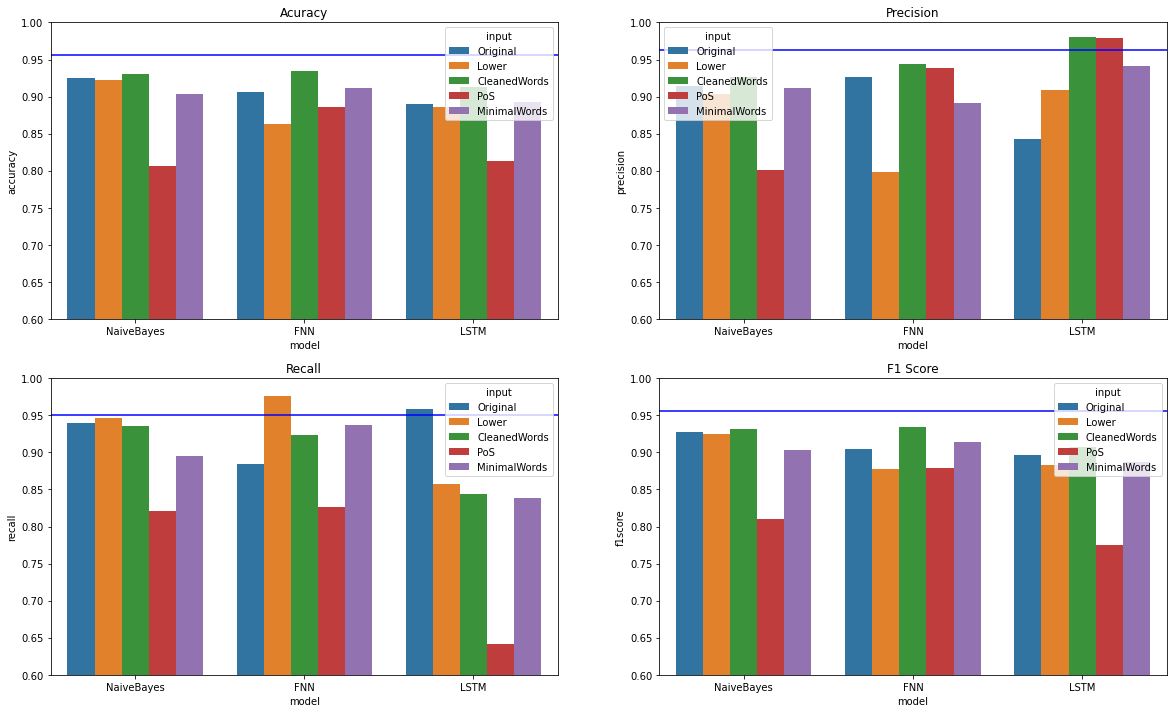

In [27]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].set_title('Acuracy')
ax[0, 0].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="accuracy", hue="input", data=df_summary, ax = ax[0, 0])
ax[0, 0].axhline(y=ac, color='b', linestyle='-')

ax[0, 1].set_title('Precision')
ax[0, 1].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="precision", hue="input", data=df_summary, ax = ax[0, 1])
ax[0, 1].axhline(y=pr, color='b', linestyle='-')

ax[1, 0].set_title('Recall')
ax[1, 0].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="recall", hue="input", data=df_summary, ax = ax[1, 0])
ax[1, 0].axhline(y=re, color='b', linestyle='-')

ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="f1score", hue="input", data=df_summary, ax = ax[1, 1])
ax[1, 1].axhline(y=f1, color='b', linestyle='-')

plt.show()

# Conclusion

By combining three models with the best performance, the final model achieved about 95% accuracy, precision, and recall performances.